<a href="https://colab.research.google.com/github/hinatanvir/Fault-Detection-SECOM/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 

In [2]:
#Function adding value label to each bar 
def add_value_labels(ax, spacing):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
path1='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom.data?token=GHSAT0AAAAAABTMJQPCMEYJ4LIGT2V6TRG2YSS5ZWA'

In [4]:
data = pd.read_csv(path1,delimiter=' ',header=None)

In [5]:
path2='https://raw.githubusercontent.com/hinatanvir/Fault-Detection-SECOM/main/secom_labels.data?token=GHSAT0AAAAAABTMJQPCJP4OZMM573LK4Q7UYSS562A'

In [6]:
label=pd.read_csv(path2,delimiter=' ',header=None)

In [7]:
data.columns = ['feature'+str(x+1) for x in range(len(data.columns))]

In [8]:
label.columns=['status','timestamp']

In [9]:
#converting timestamp to datetime format, dayfirst=True arg ensures days and month dont switch 
#for dates lesser than 13 
label['timestamp']=pd.to_datetime(label['timestamp'],dayfirst=True)

In [10]:
#dictionary for EDA
result={}

In [11]:
for col in data.columns:
    mean=data[col].mean()
    std= data[col].std()
    percent_null= pd.isnull(data[col]).sum()/len(data[col])*100
    unique=len(pd.unique(data[col]))
    outlier_df3= data[(np.abs(stats.zscore(data[col])) > 3)]
    outlier_df2= data[(np.abs(stats.zscore(data[col])) > 2)]
    count_3s=len(outlier_df3)
    count_2s=len(outlier_df2)
    min= data[col].min()
    q25=data[col].quantile(0.25)
    q50=data[col].quantile(0.5)
    q75=data[col].quantile(0.75)
    max= data[col].max()
    skewness=data[col].skew()
    kurtosis=data[col].kurtosis()
    list = []
    list.append(mean)
    list.append(std)
    list.append(percent_null)
    list.append(unique)
    list.append(count_3s)
    list.append(count_2s)
    list.append(min)
    list.append(q25)
    list.append(q50)
    list.append(q75)
    list.append(max)
    list.append(skewness)
    list.append(kurtosis)
    result[col] = list

In [13]:
result1=pd.DataFrame.from_dict(result,orient='index') 

In [28]:
result1.to_excel('eda.xlsx')

In [14]:
result1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']

In [ ]:
result1

In [22]:
tranform=result1.copy(deep=True)

In [ ]:
tranform['unique'].value_counts()

In [18]:
#bins = [0, 25, 50, 75, 100]
#labels =[1,2,3,4]
#pd.cut(df1['Score'], bins,labels=labels)
bins_null=[0,1,5,20,55,75,95]
labels_null=['<=1','1-5','5 -20','20-55','55-75','75-95']
tranform['null_bin']= pd.cut(tranform['percent_null'], bins_null,labels=labels_null,right=True)

In [29]:
bins_unique=[0,2,10,100,500,np.inf] # np.inf for greater than 500
labels_unique=['>=2','2-10','10-100','100-500','>500']
tranform['unique_bin']= pd.cut(tranform['unique'], bins_unique,labels=labels_unique,right=True)

In [45]:
bins_3s=[0,1,11,31,51,71] 
labels_3s=['<1','1-10','11-30','31-50','51-70']
tranform['3s_bin']= pd.cut(tranform['count_3s'], bins_3s,labels=labels_3s,right=False)

In [49]:
bins_2s=[0,1,11,31,51,71,np.inf] 
labels_2s=['<1','1-10','11-30','31-50','51-70','>70']
tranform['2s_bin']= pd.cut(tranform['count_2s'], bins_2s,labels=labels_2s,right=False)

In [55]:
skew_bin=[-np.inf,-1,0,np.inf]
labels_skew=['left_skewed','normal or slightly skewed','right skewed']
tranform['skew_bin']= pd.cut(tranform['skewness'], skew_bin,labels=labels_skew,right=False)

In [19]:
null_counts= tranform['null_bin'].value_counts().sort_index()# sort_index to sort the left column of rows 
#pd.crosstab(index=tranform["null_bin"], columns="count")

In [31]:
unique_counts=tranform['unique_bin'].value_counts().sort_index()

In [ ]:
unique_counts

In [50]:
bin3s_count=tranform['3s_bin'].value_counts().sort_index()

In [54]:
bin2s_count=tranform['2s_bin'].value_counts().sort_index()

In [59]:
skew_counts=tranform['skew_bin'].value_counts().sort_index()

In [60]:
skew_counts

left_skewed                   31
normal or slightly skewed     50
right skewed                 509
Name: skew_bin, dtype: int64

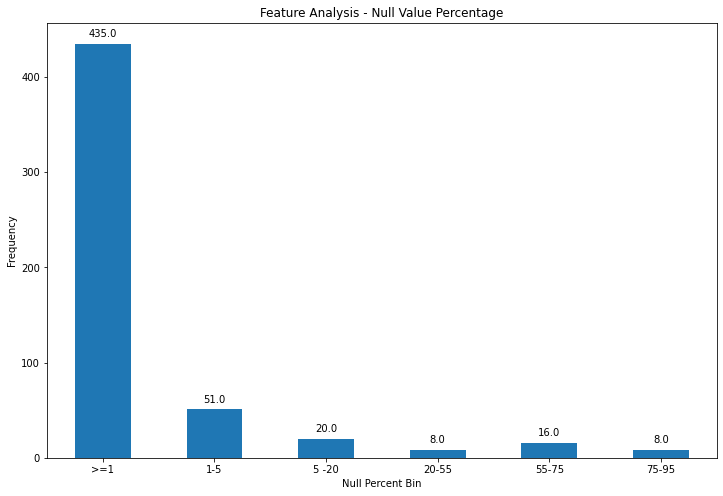

In [20]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
ax = null_counts.plot(kind="bar")
ax.set_title('Feature Analysis - Null Value Percentage')
ax.set_xlabel('Null Percent Bin')
ax.set_ylabel('Frequency')
ax.set_xticklabels(labels_null,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ax,5)
plt.show()

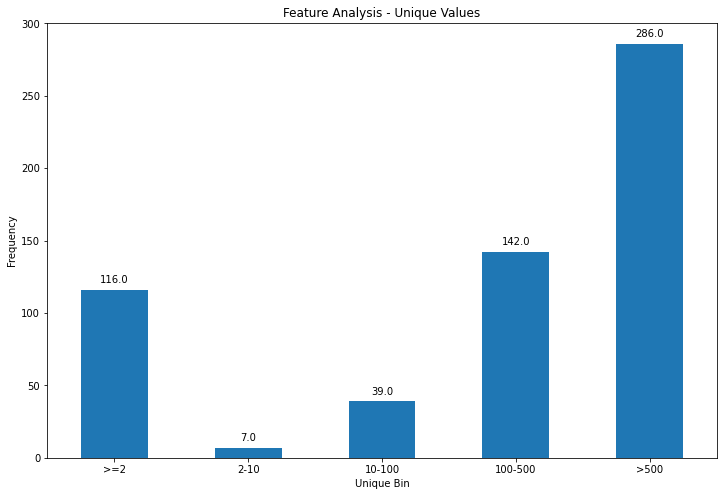

In [36]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
ux = unique_counts.plot(kind="bar")
ux.set_title('Feature Analysis - Unique Values')
ux.set_xlabel('Unique Bin')
ux.set_ylabel('Frequency')
ux.set_xticklabels(labels_unique,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(ux,5)
plt.show()

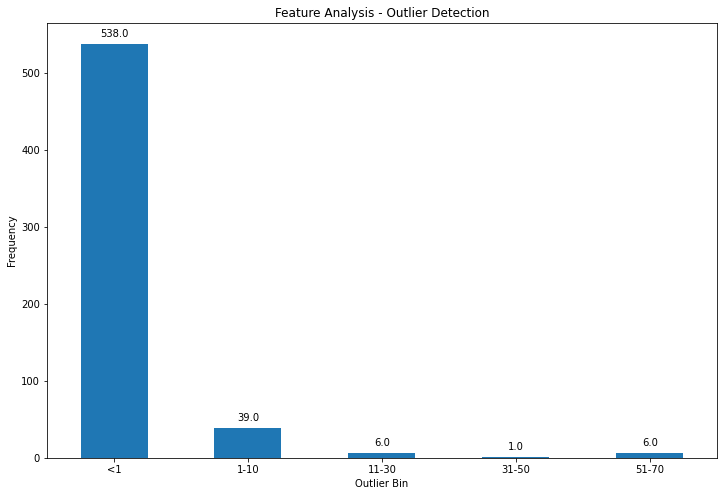

In [48]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
outx = bin3s_count.plot(kind="bar")
outx.set_title('Feature Analysis - Outlier Detection')
outx.set_xlabel('Outlier Bin')
outx.set_ylabel('Frequency')
outx.set_xticklabels(labels_3s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(outx,5)
plt.show()

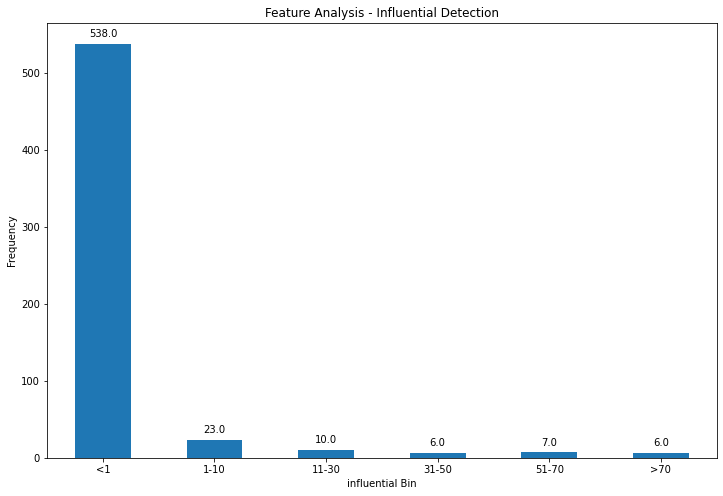

In [53]:
plt.figure(figsize=(12, 8))
# bar Graph for unique value categories 
infx = bin2s_count.plot(kind="bar")
infx.set_title('Feature Analysis - Influential Detection')
infx.set_xlabel('influential Bin')
infx.set_ylabel('Frequency')
infx.set_xticklabels(labels_2s,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(infx,5)
plt.show()

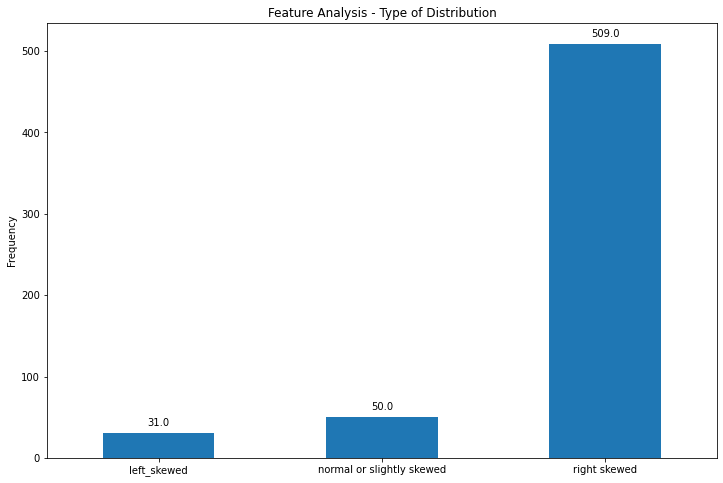

In [63]:
plt.figure(figsize=(12, 8))
# bar Graph for Null value categories 
skx = skew_counts.plot(kind="bar")
skx.set_title('Feature Analysis - Type of Distribution')
#skx.set_xlabel('Distribution Type')
skx.set_ylabel('Frequency')
skx.set_xticklabels(labels_skew,rotation=0)
#call function to add labels to null values bar chart
add_value_labels(skx,5)
plt.show()

In [66]:
plt.savefig("Percent_null.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
#result1[result1['count_3s'] > 0] # 52 features with outliers
#result1[result1['unique'] < 4] # 122 , 116 features only 2 unique values
#len(result1[result1['percent_null'] > 55]) # 24 features with null values greater than 55%

In [ ]:
desc=data.describe()

In [ ]:
desc

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [ ]:
#see distribtion of all the features 
data.hist()